In [20]:
import pandas as pd
from Nulos import Nulos
import matplotlib.pyplot as plt

In [21]:
# Ruta del archivo
ruta_archivo = r'C:\Users\AMADOR\OneDrive - Universidad de Costa Rica\I-2024\Herramientas para ciencia de datos II\Examen I Largo\Base_salarios.xlsx'

# Leer el archivo Excel
Base_salarios = pd.read_excel(ruta_archivo)

#Hacerlos objeto de la clase Nulos
df_salarios = Nulos(Base_salarios)

Base_salarios.head()


,Grupo,Departamento,División,Género,Salario base,Pago de tiempo extra,Grado de estudio
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.00,0.00,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.36,0.00,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,NaN,136970.00,0.00,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432694.00,0.00,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.00,456.68,16


# Prueba de métodos en Salarios_base

## Valorar columna "Salario base" original 

### Histograma

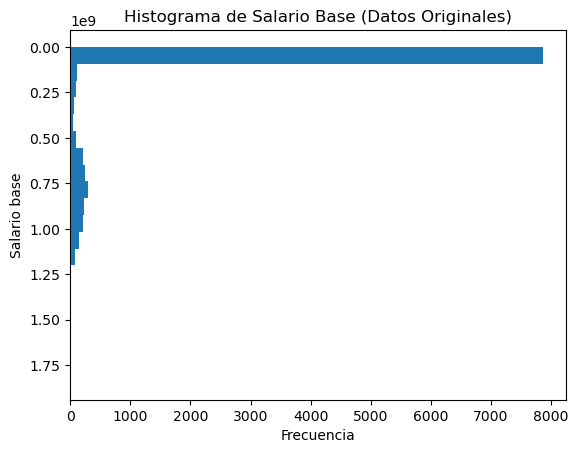

In [22]:

plt.hist(Base_salarios['Salario base'], bins=20, orientation='horizontal')

plt.title("Histograma de Salario Base (Datos Originales)")
plt.xlabel('Frecuencia')
plt.ylabel('Salario base')

plt.gca().invert_yaxis()
# ver el gráfico
plt.show()

### Tabla estadística

In [23]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
estadisticas1 = Base_salarios['Salario base'].describe()

df_estadisticas1 = pd.DataFrame(estadisticas1)
# Transponer: https://numpy.org/doc/stable/reference/generated/numpy.transpose.html
df_estadisticas1 = df_estadisticas1.transpose()
df_estadisticas1


,count,mean,std,min,25%,50%,75%,max
Salario base,9773.0,1.453652e+08,3.171114e+08,11147.24,78947.0,105942.0,167306.0,1.847173e+09


# Prueba de métodos para el tratamiento de NaN

In [24]:
#Creacion de df con los nulos eliminados con el módulo Nulos
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html
#https://www.freecodecamp.org/espanol/news/eliminar-la-lista-de-filas-del-dataframe-de-pandas/
df_eliminados = df_salarios.eliminar_nulos("Salario base")

#Creacion de df con los nulos imputados por el promedio
#https://interactivechaos.com/es/manual/tutorial-de-pandas/el-metodo-fillna
df_imput_media = df_salarios.imputacion_estadistica("Salario base")

#Creacion de df con los nulos imputados por el promedio segun la agrupación
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html
#https://www.youtube.com/watch?v=JPey7neLDzo
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
df_imput_agrupa = df_salarios.imputacion_por_grupo(['Grado de estudio','División'],"Salario base")
#Creacion de df con los nulos imputados por la banda móvil = 5
df_imput_banda = df_salarios.imputacion_banda_movil("Salario base",5)

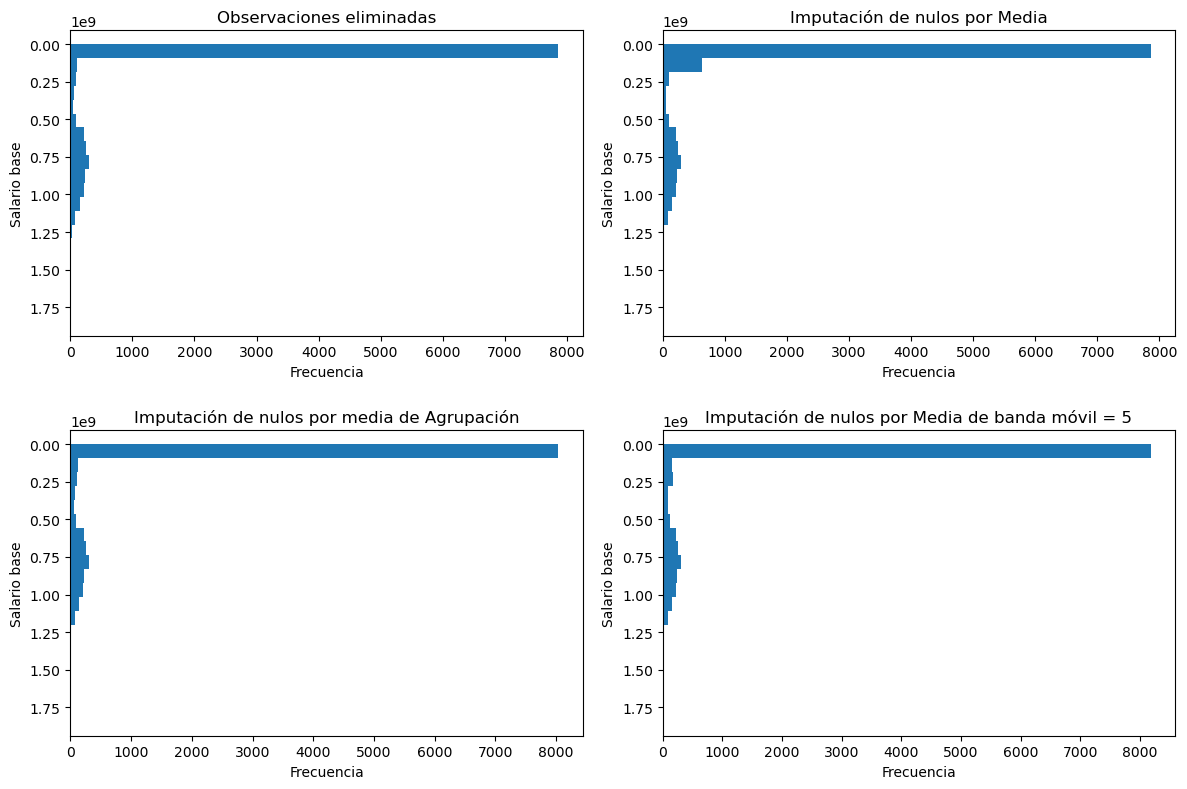

In [25]:
# Crear un grafico oficial para los subgráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Datos y etiquetas para los subgráficos
datos = [df_eliminados['Salario base'], df_imput_media['Salario base'], df_imput_agrupa['Salario base'], df_imput_banda['Salario base']]
etiquetas = ['Observaciones eliminadas', 'Imputación de nulos por Media','Imputación de nulos por media de Agrupación' , 'Imputación de nulos por Media de banda móvil = 5']

# Iterar sobre los ejes y los datos para crear los subgráficos
for ax, dato, etiqueta in zip(axs.flatten(), datos, etiquetas):
    ax.hist(dato, bins=20, orientation='horizontal')  # Histograma con orientación horizontal
    ax.set_title(etiqueta)
    ax.set_xlabel('Frecuencia')
    ax.set_ylabel('Salario base')
    ax.invert_yaxis()  # Invertir el eje y para que los datos aparezcan en orden ascendente

# Ajustar el diseño de los subgráficos
plt.tight_layout()

plt.show()

In [26]:
#Se debe hacer lo mismo para obtener una tabla para cada df y al final unirlos

# Calcular las estadísticas 
estadisticas_elim = df_eliminados['Salario base'].describe()
estadisticas_media = df_imput_media['Salario base'].describe()
estadisticas_agrupa = df_imput_agrupa['Salario base'].describe()
estadisticas_banda = df_imput_banda['Salario base'].describe()

# Crear df para cada estadísticas
df_estadisticas_elim = pd.DataFrame(estadisticas_elim)
df_estadisticas_media = pd.DataFrame(estadisticas_media)
df_estadisticas_agrupa = pd.DataFrame(estadisticas_agrupa)
df_estadisticas_banda = pd.DataFrame(estadisticas_banda)

# Transponer los df para que las estadísticas sean columnas 
df_estadisticas_elim = df_estadisticas_elim.transpose()
df_estadisticas_media = df_estadisticas_media.transpose()
df_estadisticas_agrupa = df_estadisticas_agrupa.transpose()
df_estadisticas_banda = df_estadisticas_banda.transpose()

# Agregar una columna Método para identificar cual es cual
df_estadisticas_elim['Método'] = 'Observaciones eliminadas'
df_estadisticas_media['Método'] = 'Imputación de nulos por Media'
df_estadisticas_agrupa['Método'] = 'Imputación de nulos por Media de Agrupación'
df_estadisticas_banda['Método'] = 'Imputación de nulos por Media de banda móvil = 5'

#unir
df_estadisticas_total = pd.concat([df_estadisticas_elim, df_estadisticas_media, df_estadisticas_agrupa, df_estadisticas_banda])

# Mostrar el DataFrame resultante
df_estadisticas_total


,count,mean,std,min,25%,50%,75%,max,Método
Salario base,9773.0,1.453652e+08,3.171114e+08,11147.24,78947.0,105942.0,1.673060e+05,1.847173e+09,Observaciones eliminadas
Salario base,10291.0,1.453652e+08,3.090266e+08,11147.24,78947.0,107367.0,7.138999e+07,1.847173e+09,Imputación de nulos por Media
Salario base,10011.0,1.441172e+08,3.146510e+08,11147.24,78947.0,105942.0,1.682461e+05,1.847173e+09,Imputación de nulos por Media de Agrupación
Salario base,10291.0,1.443694e+08,3.110179e+08,11147.24,78947.0,106504.0,1.960590e+05,1.847173e+09,Imputación de nulos por Media de banda móvil = 5


### Observaciones eliminadas
Según el gráfico no se aprecia alguna difencia entre los datos iniciales con nulos y despues de la eliminación de la observaciones. En la tabla de estadísticas tampoco muestra diferencia, esto sucedo porque al considerar solo esta columna para el análisis los datos nulos python los igora, por ende es como si por defecto los eliminara. 

### Imputación de nulos por Media
Según el gráfico de histograma se evidencia un cambio abrupto, pues muestra un aumento en la segunda barra, esto se puede ver apoyado por la tabla de de estadísticas, esta evidencia que la media se encuentra donde aumentó la cantidad de personas con esos salarios, que anteriormente eran todos los datos ignorados. Tambien se muestran diferencias en la distribución de los percentiles.

### Imputación de nulos por Media de Agrupación
Según  el gráfico, a pesar de ser leve, si se muestra una un crecimiento mas uniforme en las barras iniciales. Esto se puede deber a la agrupación, al aumentar un poco cada barra es un buen indicio de una buena asignación de datos, ya que no se acomularon todos de forma anormal en cierto valor. En la tabla se evidencia sobretodo en el cambio de los dos ultimos percentiles.

### Imputación de nulos por Media de banda móvil = 5
Según el gráfico, evidencia un crecimiento en la tercera barra más evidente, no obstante tambien se distribuye algo uniforme, esto se puede deber a que los datos están ordenados por departamente y divisón, entonces al realizar este tipo de imputación permite usar datos similares a los del departamento por ejemplo. En la tabla muestra una distribución de distribución d elos percentiles muy similar a la de Imputación de nulos por Media de Agrupación.

# ¿Cómo se determina una metodología razonable?

->Cantidad de datos faltantes: Eliminar columnas con una gran cantidad de valores faltantes en lugar de filas para preservar información relevante.

->Tipo de datos de a tratar: La estrategia para manejar valores faltantes difiere entre variables numéricas y categóricas.

->Predicció de faltantes: Utilizar soluciones multivariables si los datos faltantes muestran un patrón específico en relación con otras variables,
  de manear que obtener los datos faltantes es relativamente sencillo y exacto.
  
->Efecto en la distribución de la variable: Seleccionar un método considerando su impacto en la distribución original de los datos, de manera que no
  hay una pérdida significativa de datos al tratar de solucionar los nulos.
  
  Referencias: 
      https://docs.kanaries.net/es/topics/Pandas/pandas-where
      https://www.youtube.com/watch?v=O2q7tSPLCJg
      https://www.linkedin.com/pulse/c%C3%B3mo-puedo-manejar-los-valores-faltantes-seg%C3%BAn-la-raz%C3%B3n-marcelo-cruz/

# ¿Cuál usaría usted y por qué?

Yo utilizaría la metodología de Imputación de nulos por Media de Agrupación: 

1- Como el tipo de dato es numérico, el obtener algún tipo de media no es mala idea. 

2- Considero que lo clave de mi desición es que esta media no es cualquiera, sino que la perteneciente a la agrupación por Grado de estudio y división en la empresa, considero que es lo más realista posible, ya que el salario debe ser directamente dependiente de estas dos categorías. Ignoré categorías como sexo que debería ser indiferente y grupo, ya que esta es mas general que división. Por ende, considero que es la mejor imputación. 

3- Además al ser una buena imputación basada en criterios lógicos y no aleatorios o extremistas como el promedio total, el impacto total en los datos no es extremo permitiendo conservar la información en gran medida. Descarté el de banda móvil, ya que los salarios no está ordenados de mayor a menos o no presentan alguna relación más fuerte en su cercanía que la de agrupación.

# Opcional

La librería Pandas pueden realizar lo anterior, con ayuda del método 'rolling':

## De la página oficial de Pandas
El método rolling en Pandas proporciona cálculos de ventanas móviles, lo que significa que calcula estadísticas sobre una ventana deslizante de datos en una serie temporal o en una columna de un DataFrame. Aquí está una explicación de los parámetros que puedes pasar a rolling:

'window': Este parámetro especifica el tamaño de la ventana móvil. Puede ser un número entero que indica el número fijo de observaciones utilizadas para cada ventana, o puede ser un período de tiempo, cadena de tiempo, o un objeto timedelta que indica el período de tiempo de cada ventana. Por ejemplo, si pasas window=2, estarás calculando estadísticas utilizando las dos observaciones anteriores.

'min_periods': Este parámetro especifica el número mínimo de observaciones en la ventana requeridas para calcular un valor; de lo contrario, el resultado es NaN.

'center': Este parámetro indica si los índices de las ventanas deben ser el centro de la ventana (si es True) o el borde derecho de la ventana (si es False).

'win_type': Este parámetro especifica el tipo de ventana a utilizar. Por ejemplo, puedes especificar funciones de ventana de la biblioteca scipy.signal.

'on': Este parámetro, opcional, te permite calcular la ventana móvil en función de una columna de un DataFrame en lugar del índice del DataFrame.

'axis': Este parámetro especifica si se debe aplicar el cálculo de la ventana a través de las filas (axis=0 o 'index') o a través de las columnas (axis=1 o 'columns'). En la última versión, se ha marcado como obsoleta la opción axis, y se sugiere transponer el DataFrame si se desea realizar el cálculo a lo largo de las columnas.

'closed': Este parámetro indica cómo se debe manejar el extremo de la ventana. Por ejemplo, puedes especificar que el primer punto en la ventana se excluya de los cálculos ('right'), o que el último punto en la ventana se excluya ('left').

'step': Este parámetro, introducido en la versión 1.5.0, evalúa la ventana en cada paso de resultado, equivalente a realizar un corte como [::step]. La ventana debe ser un número entero. Usar un argumento de paso que no sea None o 1 producirá un resultado con una forma diferente al de la entrada.

'method': Este parámetro, introducido en la versión 1.3.0, ejecuta la operación de ventana móvil por columna o fila ('single') o sobre el objeto completo ('table'). Este argumento solo se implementa al especificar engine='numba' en la llamada del método.

#### Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html#pandas-dataframe-rolling

## Foro stackoverflow
Deberías probar con el código:

df['MA2']=df['Cierre'].rolling(window=2).mean().shift(1)

El complemento .rolling(window=NumeroDeMediasMoviles).mean() logra obtener las medias móviles a partir del promedio de los dos datos anteriores, el shift es para poder mover un espacio la media y así la media móvil del periodo N será igual al promedio del periodo N-1 y N-2, sin esa parte del código sacaría el promedio del periodo N y N-1 para esa misma posición, así que con eso regulamos que las medias sean de los dos periodos anteriores.

#### Referencia: https://es.stackoverflow.com/questions/44874/a%C3%B1adir-columna-a-dataframe-con-una-media-movil-sobre-los-registros-del-mismo